In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_score,accuracy_score,classification_report,roc_auc_score,roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [2]:
telecom_df = pd.read_csv("Telecom_Data.csv")

In [3]:
telecom_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
telecom_df.shape

(7043, 21)

In [5]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
telecom_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
telecom_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
y = telecom_df['Churn']
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [9]:
telecom_df.drop(columns= ['Churn','customerID'],inplace = True)

In [10]:
telecom_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6


In [11]:
telecom_df['TotalCharges'] = pd.to_numeric(telecom_df['TotalCharges'], errors = 'coerce')
telecom_df['SeniorCitizen'] = telecom_df['SeniorCitizen'].astype(object)

In [12]:
telecom_df['TotalCharges'].fillna(telecom_df['TotalCharges'].mean(),inplace = True)

C:\Users\azeem\AppData\Local\Temp\ipykernel_30808\2625668793.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  telecom_df['TotalCharges'].fillna(telecom_df['TotalCharges'].mean(),inplace = True)


In [13]:
cat_cols = [col for col in telecom_df.columns if telecom_df[col].dtype == object]
con_cols = [col for col in telecom_df.columns if telecom_df[col].dtype != object]

In [14]:
# train test split
X_train, X_test, Y_train, Y_test = train_test_split(telecom_df, y, test_size = 0.2, random_state= 42, stratify = y )

In [15]:
 # filling missing values
X_train['TotalCharges'].fillna(X_train['TotalCharges'].mean(),inplace = True)
X_test['TotalCharges'].fillna(X_train['TotalCharges'].mean(),inplace = True)

C:\Users\azeem\AppData\Local\Temp\ipykernel_30808\1427341630.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['TotalCharges'].fillna(X_train['TotalCharges'].mean(),inplace = True)
C:\Users\azeem\AppData\Local\Temp\ipykernel_30808\1427341630.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

In [16]:
# scaling
'''std_scaler = StandardScaler()
for col in con_cols:
    X_train[col] = std_scaler.fit_transform(np.array(X_train[col]).reshape(-1,1))
    X_test[col] = std_scaler.transform(np.array(X_test[col]).reshape(-1,1))
'''

'std_scaler = StandardScaler()\nfor col in con_cols:\n    X_train[col] = std_scaler.fit_transform(np.array(X_train[col]).reshape(-1,1))\n    X_test[col] = std_scaler.transform(np.array(X_test[col]).reshape(-1,1))\n'

In [17]:
# encoding
oe = OrdinalEncoder(unknown_value = -1,handle_unknown = 'use_encoded_value')
for col in cat_cols:
     X_train[col] = oe.fit_transform(np.array(X_train[col]).reshape(-1,1))
     X_test[col] = oe.transform(np.array(X_test[col]).reshape(-1,1))
    

In [18]:
rf = RandomForestClassifier(random_state= 42)
rf.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

In [19]:
# RandomizedSearchCV

params_dict = {
              'max_depth' :[5,6,7,8,9,10],
              'min_samples_split' : [3,4,5,6,7],
              'min_samples_leaf': [3,4,5,7,6], 
              'max_leaf_nodes' : [5,6,7,8,9] 
              }

rcv = RandomizedSearchCV(rf,param_distributions = params_dict,cv = 5,n_iter = 100,verbose = 3)

rcv.fit(X_train,Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=7;, score=0.794 total time=   0.7s
[CV 2/5] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=7;, score=0.783 total time=   0.7s
[CV 3/5] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=7;, score=0.787 total time=   0.9s
[CV 4/5] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=7;, score=0.778 total time=   0.8s
[CV 5/5] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=7;, score=0.785 total time=   0.7s
[CV 1/5] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=6;, score=0.794 total time=   0.6s
[CV 2/5] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=6;, score=0.783 total time=   0.6s
[CV 3/5] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=6;, score=0.787 total time=   0.8s
[

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [5, 6, 7, 8, 9, 10],
                                        'max_leaf_nodes': [5, 6, 7, 8, 9],
                                        'min_samples_leaf': [3, 4, 5, 7, 6],
                                        'min_samples_split': [3, 4, 5, 6, 7]},
                   verbose=3)

In [20]:
Y_pred = rcv.predict(X_test)
Y_pred

array(['No', 'Yes', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [21]:
Y_prob = rcv.predict_proba(X_test)[:,1]
Y_prob

array([0.08737013, 0.52640953, 0.10654239, ..., 0.1477136 , 0.06075571,
       0.07271876])

In [22]:
rcv.best_params_

{'min_samples_split': 4,
 'min_samples_leaf': 6,
 'max_leaf_nodes': 9,
 'max_depth': 10}

In [23]:
rcv.best_score_

0.7928646290549581

In [24]:
accuracy_score(Y_test,Y_pred)

0.7920511000709723

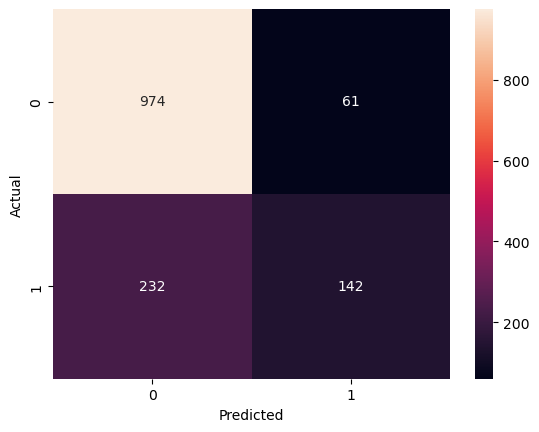

In [25]:
cm = confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot= True, fmt= 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [26]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

          No       0.81      0.94      0.87      1035
         Yes       0.70      0.38      0.49       374

    accuracy                           0.79      1409
   macro avg       0.75      0.66      0.68      1409
weighted avg       0.78      0.79      0.77      1409



In [27]:
roc_auc_score(Y_test,Y_prob)

0.8339895114831176

In [28]:
importance = pd.Series(rf.feature_importances_,index=telecom_df.columns).sort_values(ascending= False)
importance.head(10)

TotalCharges       0.186751
MonthlyCharges     0.179257
tenure             0.154475
Contract           0.079580
PaymentMethod      0.050087
OnlineSecurity     0.049568
TechSupport        0.043567
gender             0.027918
InternetService    0.027767
OnlineBackup       0.027053
dtype: float64

In [29]:
results = X_test.copy()
results['Actual_Churn'] = Y_test.values
results['Predicted_Churn'] = Y_pred
results['Churn_Probability'] = Y_prob
results.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Actual_Churn,Predicted_Churn,Churn_Probability
437,1.0,0.0,1.0,1.0,72,1.0,2.0,1.0,2.0,2.0,...,2.0,2.0,2.0,1.0,1.0,114.05,8468.20,No,No,0.087370
2280,0.0,1.0,0.0,0.0,8,1.0,2.0,1.0,0.0,0.0,...,2.0,2.0,0.0,1.0,1.0,100.15,908.55,No,Yes,0.526410
2235,0.0,0.0,1.0,1.0,41,1.0,2.0,0.0,2.0,2.0,...,2.0,0.0,1.0,1.0,1.0,78.35,3211.20,No,No,0.106542
4460,1.0,0.0,1.0,0.0,18,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,78.20,1468.75,No,No,0.344157
3761,0.0,0.0,1.0,0.0,72,1.0,2.0,0.0,2.0,2.0,...,2.0,2.0,2.0,1.0,1.0,82.65,5919.35,No,No,0.103045
